# Bivariate: Geographic vs Geographic

In [2]:
require(tidyverse)
require(network)
require(GGally)
require(readxl)
require(sna)
require(repr)

In [3]:
options(repr.plot.width=12, repr.plot.height=12)

In [4]:
flights <- read_excel("Datasets/airports/Top 1000 2015 US Airline Route Segments by Volume.xlsx")

In [5]:
flights %>% 
    separate(`CARRIER_NAME-ORIGIN_CITY_NAME-DEST_CITY_NAME`, c('Airline', 'Origin', 'Destination'), '-') %>% 
    mutate(Destination = str_replace_all(Destination, 'Total', '')) %>% 
    filter(!str_detect(Airline, 'Total')) %>% 
    filter(complete.cases(.)) -> flights

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 1 rows [1].”


In [6]:
flights %>% 
    filter(Airline == 'Delta Air Lines Inc.') %>% 
    select(Origin, Destination) %>%
    network(directed=F) -> flight.net

In [7]:
flight.net %v% 'airline' = flights$Airline[flights$Airline == 'Delta Air Lines Inc.']

In [8]:
flight.net %v% 'passengers' = flights$PASSENGERS[flights$Airline == 'Delta Air Lines Inc.']

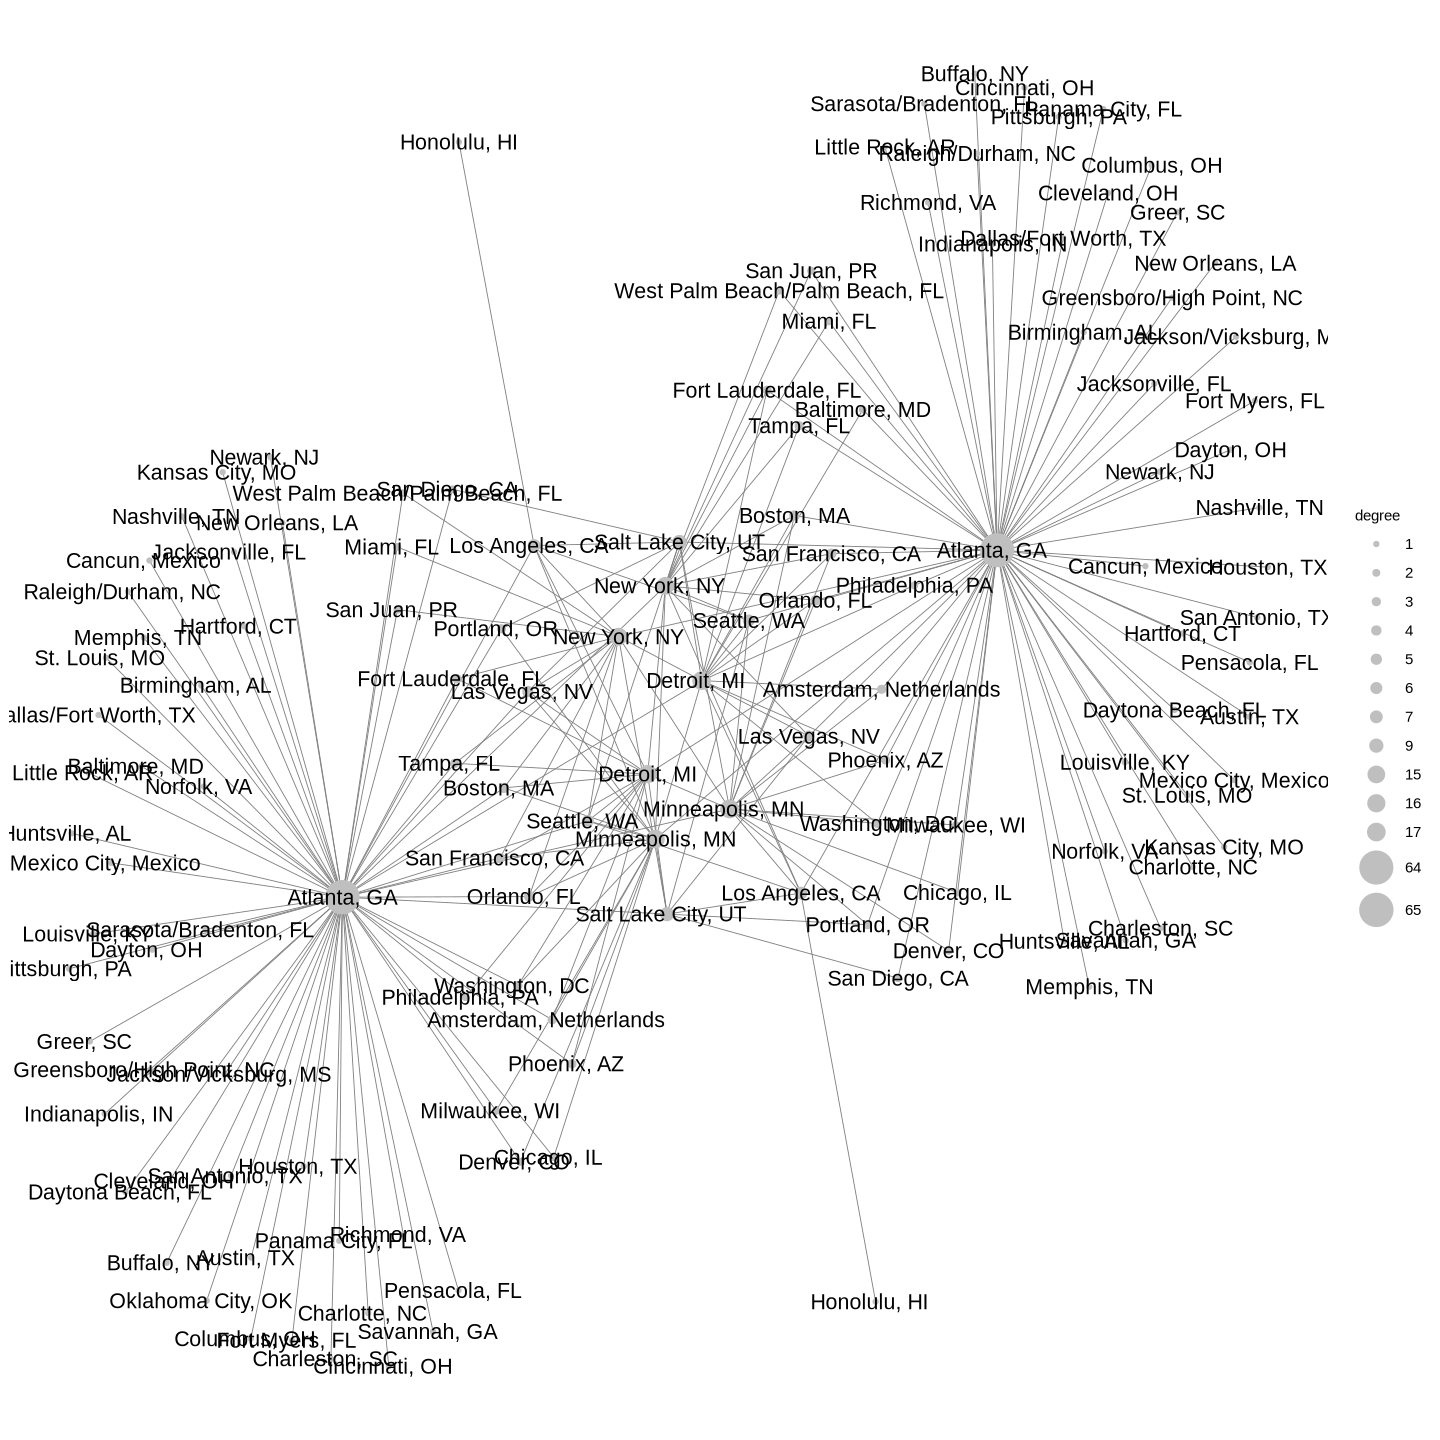

In [9]:
flight.net %>% ggnet2(label=T, size='degree') 